<a href="https://colab.research.google.com/github/jsomya/deep-learning/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from IPython.display import SVG
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#tf.enable_eager_execution()

import os


PATH="./sample_data/"
print(os.getcwd())

print(os.listdir(PATH))




For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using TensorFlow backend.


/content
['anscombe.json', 'README.md', 'fashion-mnist_train.csv', 'fashion-mnist_test.csv', 'mnist_test.csv', 'california_housing_test.csv', 'mnist_train_small.csv', 'california_housing_train.csv']


Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785
Ankle Boot          :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Coat                :   6000 or 10.0%
Dress               :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Trouser             :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Total number of sample images to plot:  40


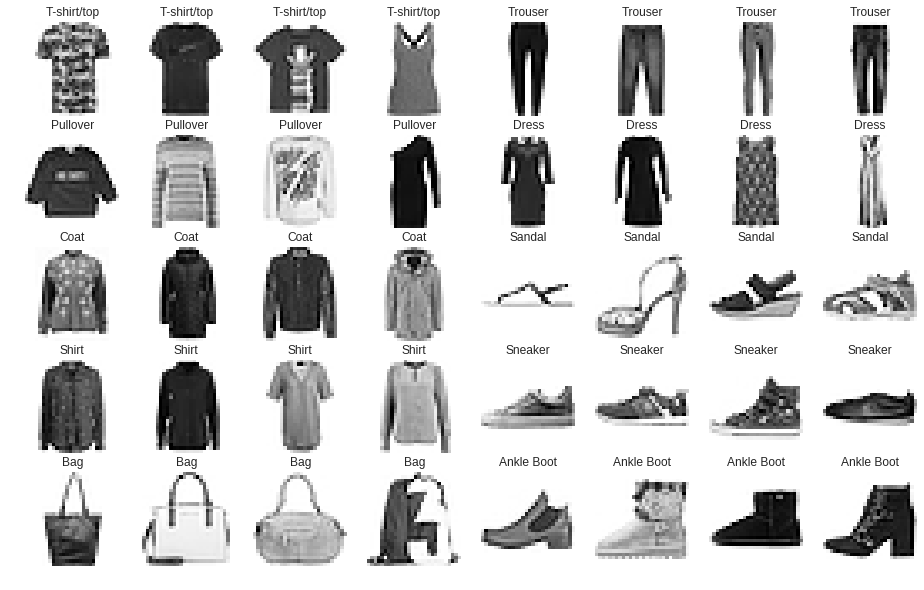

Instructions for updating:
Colocations handled automatically by placer.


W0404 00:12:25.183773 140289069062016 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


W0404 00:12:25.269327 140289069062016 deprecation.py:506] From <ipython-input-2-27d201dad5d0>:192: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Epoch 001 Batch 001: cost = 0.061, accuracy = 0.04%
Epoch 001 Batch 002: cost = 0.126, accuracy = 0.08%
Epoch 001 Batch 003: cost = 0.153, accuracy = 0.13%
Epoch 001 Batch 004: cost = 0.178, accuracy = 0.23%
Epoch 001 Batch 005: cost = 0.195, accuracy = 0.31%
Epoch 001 Batch 006: cost = 0.205, accuracy = 0.39%
Epoch 001 Batch 007: cost = 0.213, accuracy = 0.48%
Epoch 001 Batch 008: cost = 0.220, accuracy = 0.56%
Epoch 001 Batch 009: cost = 0.225, accuracy = 0.64%
Epoch 001 Batch 010: cost = 0.229, accuracy = 0.74%
Epoch 001 Batch 011: cost = 0.232, accuracy = 0.84%
Epoch 001 Batch 012: cost = 0.236, accuracy = 0.93%
Epoch 001 Batch 013: cost = 0.239, accuracy = 1.03%
Epoch 001 Batch 014: cost = 0.242, accuracy = 1.13%
Epoch 001 Batch 015: cost = 0.246, accuracy = 1.23%
Epoch 001 Batch 016: cost = 0.249, accuracy = 1.32%
Epoch 001 Batch 017: cost = 0.252, accuracy = 1.42%
Epoch 001 Batch 018: cost = 0.255, accuracy = 1.53%
Epoch 001 Batch 019: cost = 0.258, accuracy = 1.62%
Epoch 001 Ba

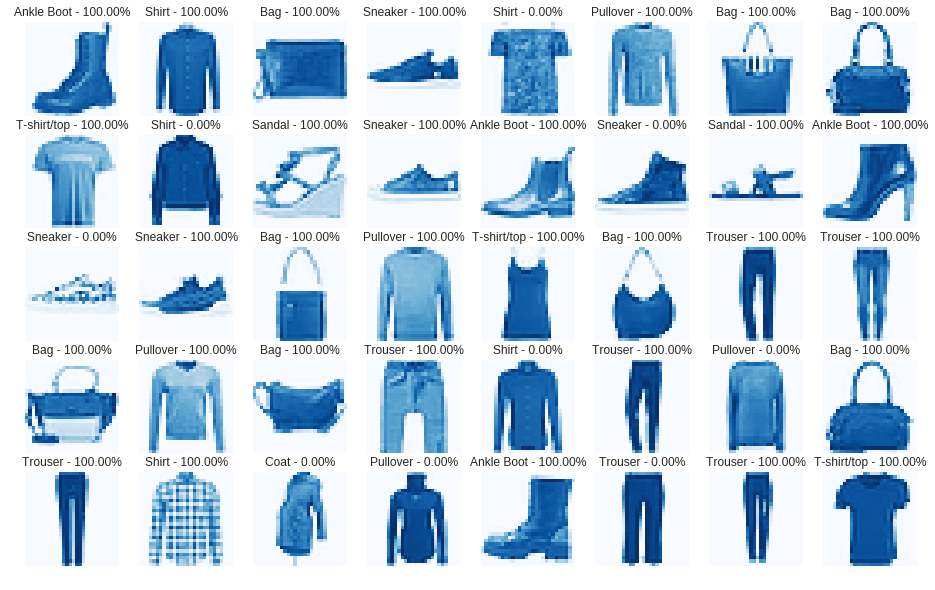

Done....


In [2]:
FLATTEN_IMG_COLS = 784
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}



train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

# convert to Pandas.dataFrame
def convert_mnist_to_df(dataset):
  data_array = np.zeros((0,NUM_COLS))
  label_array = []
  for data in tfds.as_numpy(dataset):
    image,label = data['image'],data['label']
    
    np.append(data_array,np.reshape(image,(1,NUM_COLS)), axis=0)
    label_array.append(label)
    
  
  # done iterating
  # convert to numpy
  X_data = np.array(data_array)
  Y_data = np.array(label_array)
  
  # convert to pd.DataFrame
  X = pd.DataFrame(X_data)
  # munge columns
  num_images = X.shape[1]
  X.columns = ['pixel_'+str(x) for x in range(num_images)]
  # add label data
  #X['label'] = Y_data
  X.insert(0,'label',Y_data)
  X = X.fillna(0)
  
  return X

def convert_mnist_to_df2(images,labels):
  data_array = np.zeros((0,NUM_COLS))
  label_array = []
  for idx,image in enumerate(images):
    image = image.reshape(1,FLATTEN_IMG_COLS)
    #np.append(data_array,np.reshape(image,(1,NUM_COLS)), axis=0)
    np.append(data_array,image, axis=0)
    #label_array.append(label)
    
  
  # done iterating
  # convert to numpy
  X_data = np.array(data_array)
  Y_data = np.array(labels)
  
  # convert to pd.DataFrame
  X = pd.DataFrame(X_data)
  # munge columns
  num_images = X.shape[1]
  X.columns = ['pixel_'+str(x) for x in range(num_images)]
  # add label data
  #X['label'] = Y_data
  X.insert(0,'label',Y_data)
  X = X.fillna(0)
  
  return X
  
  

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = data["label"].value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))


def sample_images_data(data,labels):
  # An empty list to collect some samples
  sample_images = []
  sample_labels = []

  # Iterate over the keys of the labels dictionary defined in the above cell
  for k in labels.keys():
    # Get four samples for each category
    samples = data[data["label"] == k].head(4)
    # Append the samples to the samples list
    for j, s in enumerate(samples.values):
      # First column contain labels, hence index should start from 1
      img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
      sample_images.append(img)
      sample_labels.append(samples.iloc[j, 0])

  print("Total number of sample images to plot: ", len(sample_images))
  return sample_images, sample_labels

def random_image_data(test_data):
  #print("Test data shape ",test_data.shape)
  rand_images = []
  rand_labels = []
  
  rand_indexes = np.random.randint(0,test_data.shape[0]-1,size=40)
  for idx in rand_indexes:
    img = np.array(test_data.iloc[idx, 1:])
    rand_images.append(img)
    rand_labels.append(test_data.iloc[idx, 0])
  
  print("Total number of random images to validate and plot: ", len(rand_images))
  return rand_images, rand_labels
  

def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    # Plot the sample images now
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
      ax[i//8, i%8].imshow(img, cmap=cmap)
      ax[i//8, i%8].axis('off')
      ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()   
    
def plot_prediction_image_data(prediction_data,cmap="Greys"):
  f, ax = plt.subplots(5,8, figsize=(16,10))
  for i, data in enumerate(prediction_data):
      ax[i//8, i%8].imshow(data['image'], cmap=cmap)
      ax[i//8, i%8].axis('off')
      legend = '{} - {:.2f}%'.format(labels[data['label']],data['pred'])
      ax[i//8, i%8].set_title(legend)
  plt.show()   
    

# get training and test data-set
#fmnist_train = fmnist_builder.as_dataset(split=tfds.Split.TRAIN)
#fmnist_test = fmnist_builder.as_dataset(split=tfds.Split.TEST)



#print(train_data['label'])
get_classes_distribution(train_data)


train_sample_images, train_sample_labels = sample_images_data(train_data,labels)
plot_sample_images(train_sample_images,train_sample_labels,'Greys')

images = np.array(train_data.iloc[:, 1:])
train_labels = to_categorical(np.array(train_data.iloc[:, 0]))

# test
test_images = np.array(test_data.iloc[:, 1:])
test_labels = to_categorical(np.array(test_data.iloc[:, 0]))


def dense(x, W, b):
  z = tf.add(tf.matmul(x, W), b)
  return tf.nn.relu(z)

def conv2D(x, W, b, stride_length=1):
  xW = tf.nn.conv2d(x, W, strides=[1, stride_length, stride_length, 1], padding='SAME')
  z = tf.nn.bias_add(xW, b)
  return tf.nn.relu(z)

def maxpooling2D(x, p_size):
  z = tf.nn.max_pool(x, ksize=[1, p_size, p_size, 1], strides=[1, p_size, p_size, 1], padding='SAME')
  return z

def network(x, weights, biases, n_in, mp_size, mp_dropout, dense_dropout):
  sq_dim = int(np.sqrt(n_in))
  sq_x = tf.reshape(x, shape=[-1, sq_dim, sq_dim, 1])

  conv1 = conv2D(sq_x, weights['w_c1'], biases['b_c1'])
  conv2 = conv2D(conv1, weights['w_c2'], biases['b_c2'])

  mp1 = maxpooling2D(conv2, mp_size)
  mp1 = tf.nn.dropout(mp1, 1- mp_dropout)

  flat = tf.reshape(mp1, [-1, weights['w_d1'].get_shape().as_list()[0]])
  dense1 = dense(flat, weights['w_d1'], biases['b_d1'])
  dense1 = tf.nn.dropout(dense1, 1 - dense_dropout)

  out = tf.add(tf.matmul(dense1, weights['w_out']), biases['b_out'])
  return out

def next_batch(batch_size,images,labels,total_size):
  idx = np.arange(0 , total_size -1)
  np.random.shuffle(idx)
  idx = idx[:batch_size]
  data_shuffle = [images[i] for i in idx]
  labels_shuffle = [labels[i] for i in idx]
  return np.asarray(data_shuffle), np.asarray(labels_shuffle)


def compute_cost(predicted, actual):
    """
    This routine computes the cross entropy log loss for each of output node/classes.
    returns mean loss is computed over n_class nodes.
    """
    total_loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits = predicted,labels = actual)
    avg_loss = tf.reduce_mean(total_loss)
    return avg_loss


def create_optimizer(learning_rate):
    """
    we will use the Adam method for optimization (http://arxiv.org/abs/1412.6980),
    because, generally, it requires less fine-tuning.
    """

    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    return optimizer
  
n_conv1 = 32
k_conv1 = 3
n_conv2 = 64
k_conv2 = 3
n_pool_size = 2
mp_dropout = 0.25
dense_dropout = 0.5
n_classes = 10
n_inputs = 784
n_dense = 128
learning_rate = 0.0005 

run_accuracy_on_test=0

weight_initializer = tf.contrib.layers.xavier_initializer()

biases = {
  'b_c1': tf.Variable(tf.zeros([n_conv1])),
  'b_c2': tf.Variable(tf.zeros([n_conv2])),
  'b_d1': tf.Variable(tf.zeros([n_dense])),
  'b_out': tf.Variable(tf.zeros([n_classes])),
}

full_sq_len = np.sqrt(n_inputs)
pooled_sq_len = int(full_sq_len / n_pool_size)
dense_inputs = pooled_sq_len ** 2  * n_conv2

weights = {
  'w_c1': tf.get_variable('w_c1', [k_conv1, k_conv1, 1, n_conv1], initializer=weight_initializer),
  'w_c2': tf.get_variable('w_c2', [k_conv2, k_conv2, n_conv1, n_conv2], initializer=weight_initializer),
  'w_d1': tf.get_variable('w_d1', [dense_inputs, n_dense], initializer=weight_initializer),
  'w_out': tf.get_variable('w_out', [n_dense, n_classes], initializer=weight_initializer)
}
  
x = tf.placeholder(tf.float32, [None, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

predictions = network(x, weights, biases, n_inputs, n_pool_size, mp_dropout, dense_dropout)

#cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
#optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
cost=compute_cost(predictions,y)
optimizer = create_optimizer(learning_rate).minimize(cost)
correct_predictions = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
accuracy_pct = tf.reduce_mean(tf.cast(correct_predictions, tf.float32)) * 100

initializer_op = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(initializer_op)
    
    #make this 100
    n_epocs = 1
    batch_size = 128
    
    for epoch in range(n_epocs):
      avg_cost = 0.0
      avg_accuracy_pct = 0.0
      n_batches = int(60000/batch_size)
        
      for i in range(n_batches):
        # training data
        batch_x, batch_y = next_batch(batch_size,images,train_labels,60000)
        _, batch_cost, batch_acc = session.run([optimizer, cost, accuracy_pct], feed_dict = {x:batch_x, y:batch_y})
        avg_cost += batch_cost / n_batches
        avg_accuracy_pct += batch_acc / n_batches

        print("Epoch ", '%03d' % (epoch+1),
                      " Batch ", '%03d' % (i+1),
                      ": cost = ", '{:.3f}'.format(avg_cost), 
                      ", accuracy = ", '{:.2f}'.format(avg_accuracy_pct), "%", 
                      sep='')
        
   
    #testing
    #_, acc = session.run(accuracy_pct, feed_dict = {x:test_images, y:test_labels})
    #print("Test accuracy = ", '{:.2f}'.format(accuracy_pct), "%", 
    #                sep='')
    # model is trained - apply it on testing data
    if run_accuracy_on_test > 0:
      n_batches = int(10000/batch_size)
      avg_accuracy_pct = 0.0
      for i in range(n_batches):
        batch_x, batch_y = next_batch(batch_size,test_images,test_labels,10000)
        batch_acc = session.run(accuracy_pct, feed_dict = {x:batch_x, y:batch_y})
        avg_accuracy_pct += batch_acc / n_batches
        print(" Test Batch ", '%03d' % (i+1),
                          ", test accuracy = ", '{:.2f}'.format(avg_accuracy_pct), "%", 
                          sep='')
    
    # verifying random data
    # get random sample data
    test_random_images, test_random_labels = random_image_data(test_data)
    prediction_data = []
    for idx,image in enumerate(test_random_images):
      hot_encode = np.zeros(10)
      hot_encode[test_random_labels[idx]] = 1.0
      hot_encode_2d = np.array([hot_encode])
      
      prediction = session.run(accuracy_pct, feed_dict = {x:[image], y:hot_encode_2d})
      #print("Test accuracy = ", '{:.2f}'.format(prediction),"%")
      # save accuracy and image
      result = {"image":image.reshape(IMG_ROWS,IMG_COLS),"label":test_random_labels[idx],"pred":prediction}
      # stash it
      prediction_data.append(result)
    
    plot_prediction_image_data(prediction_data,'Blues')

print("Done....")
